In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [67]:
df = pd.read_csv('tips.csv')

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['day'] = label_encoder.fit_transform(df['day'])
df['time'] = label_encoder.fit_transform(df['time'])

In [68]:
X = df.drop(columns=['tip'], axis = 1)  # Assuming 'tip' is the target variable
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

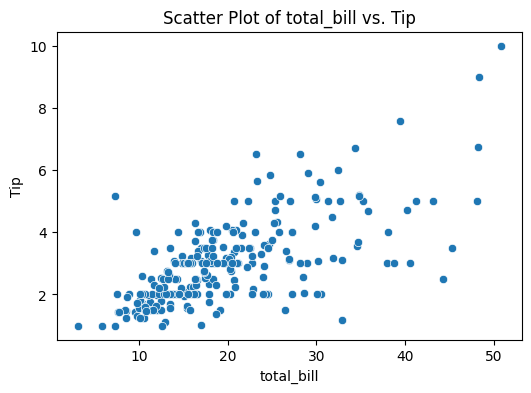

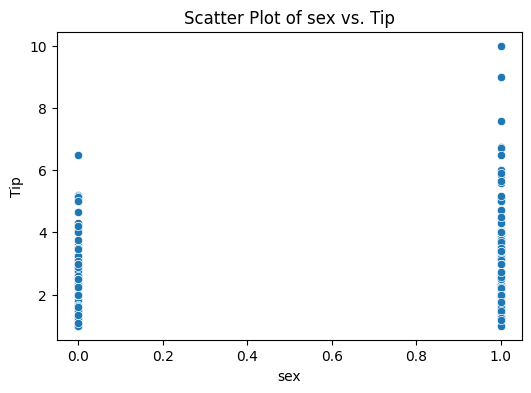

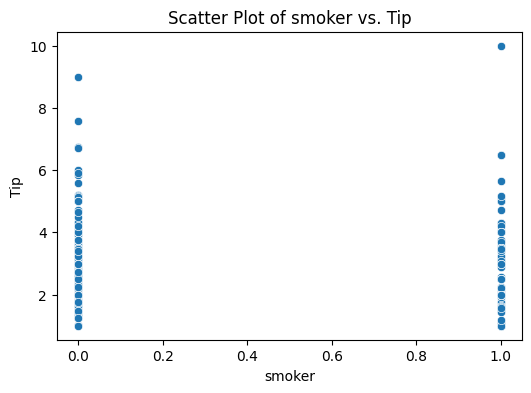

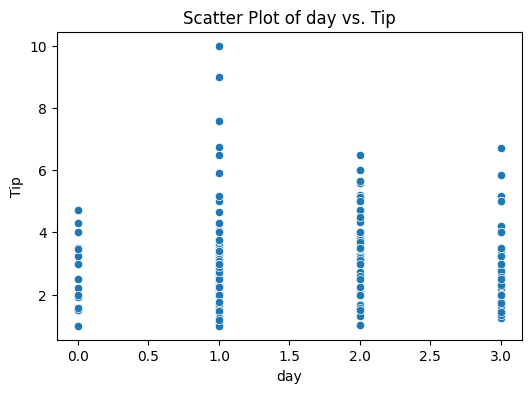

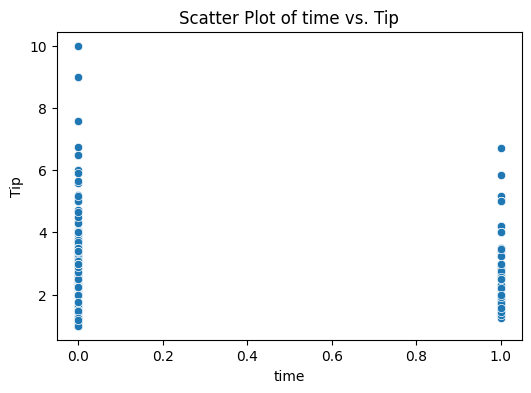

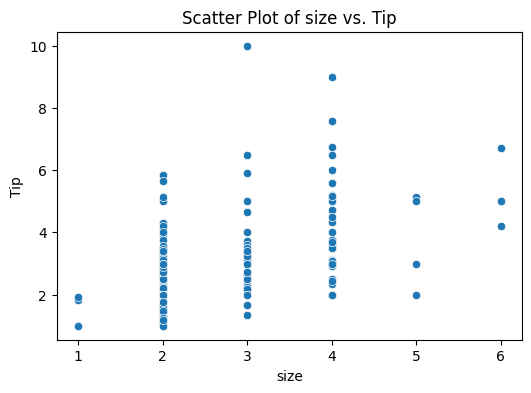

In [69]:
# Scatter plots to examine relationships between each feature and 'tip'
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[column], y=y)
    plt.title(f'Scatter Plot of {column} vs. Tip')
    plt.xlabel(column)
    plt.ylabel('Tip')
    plt.show()

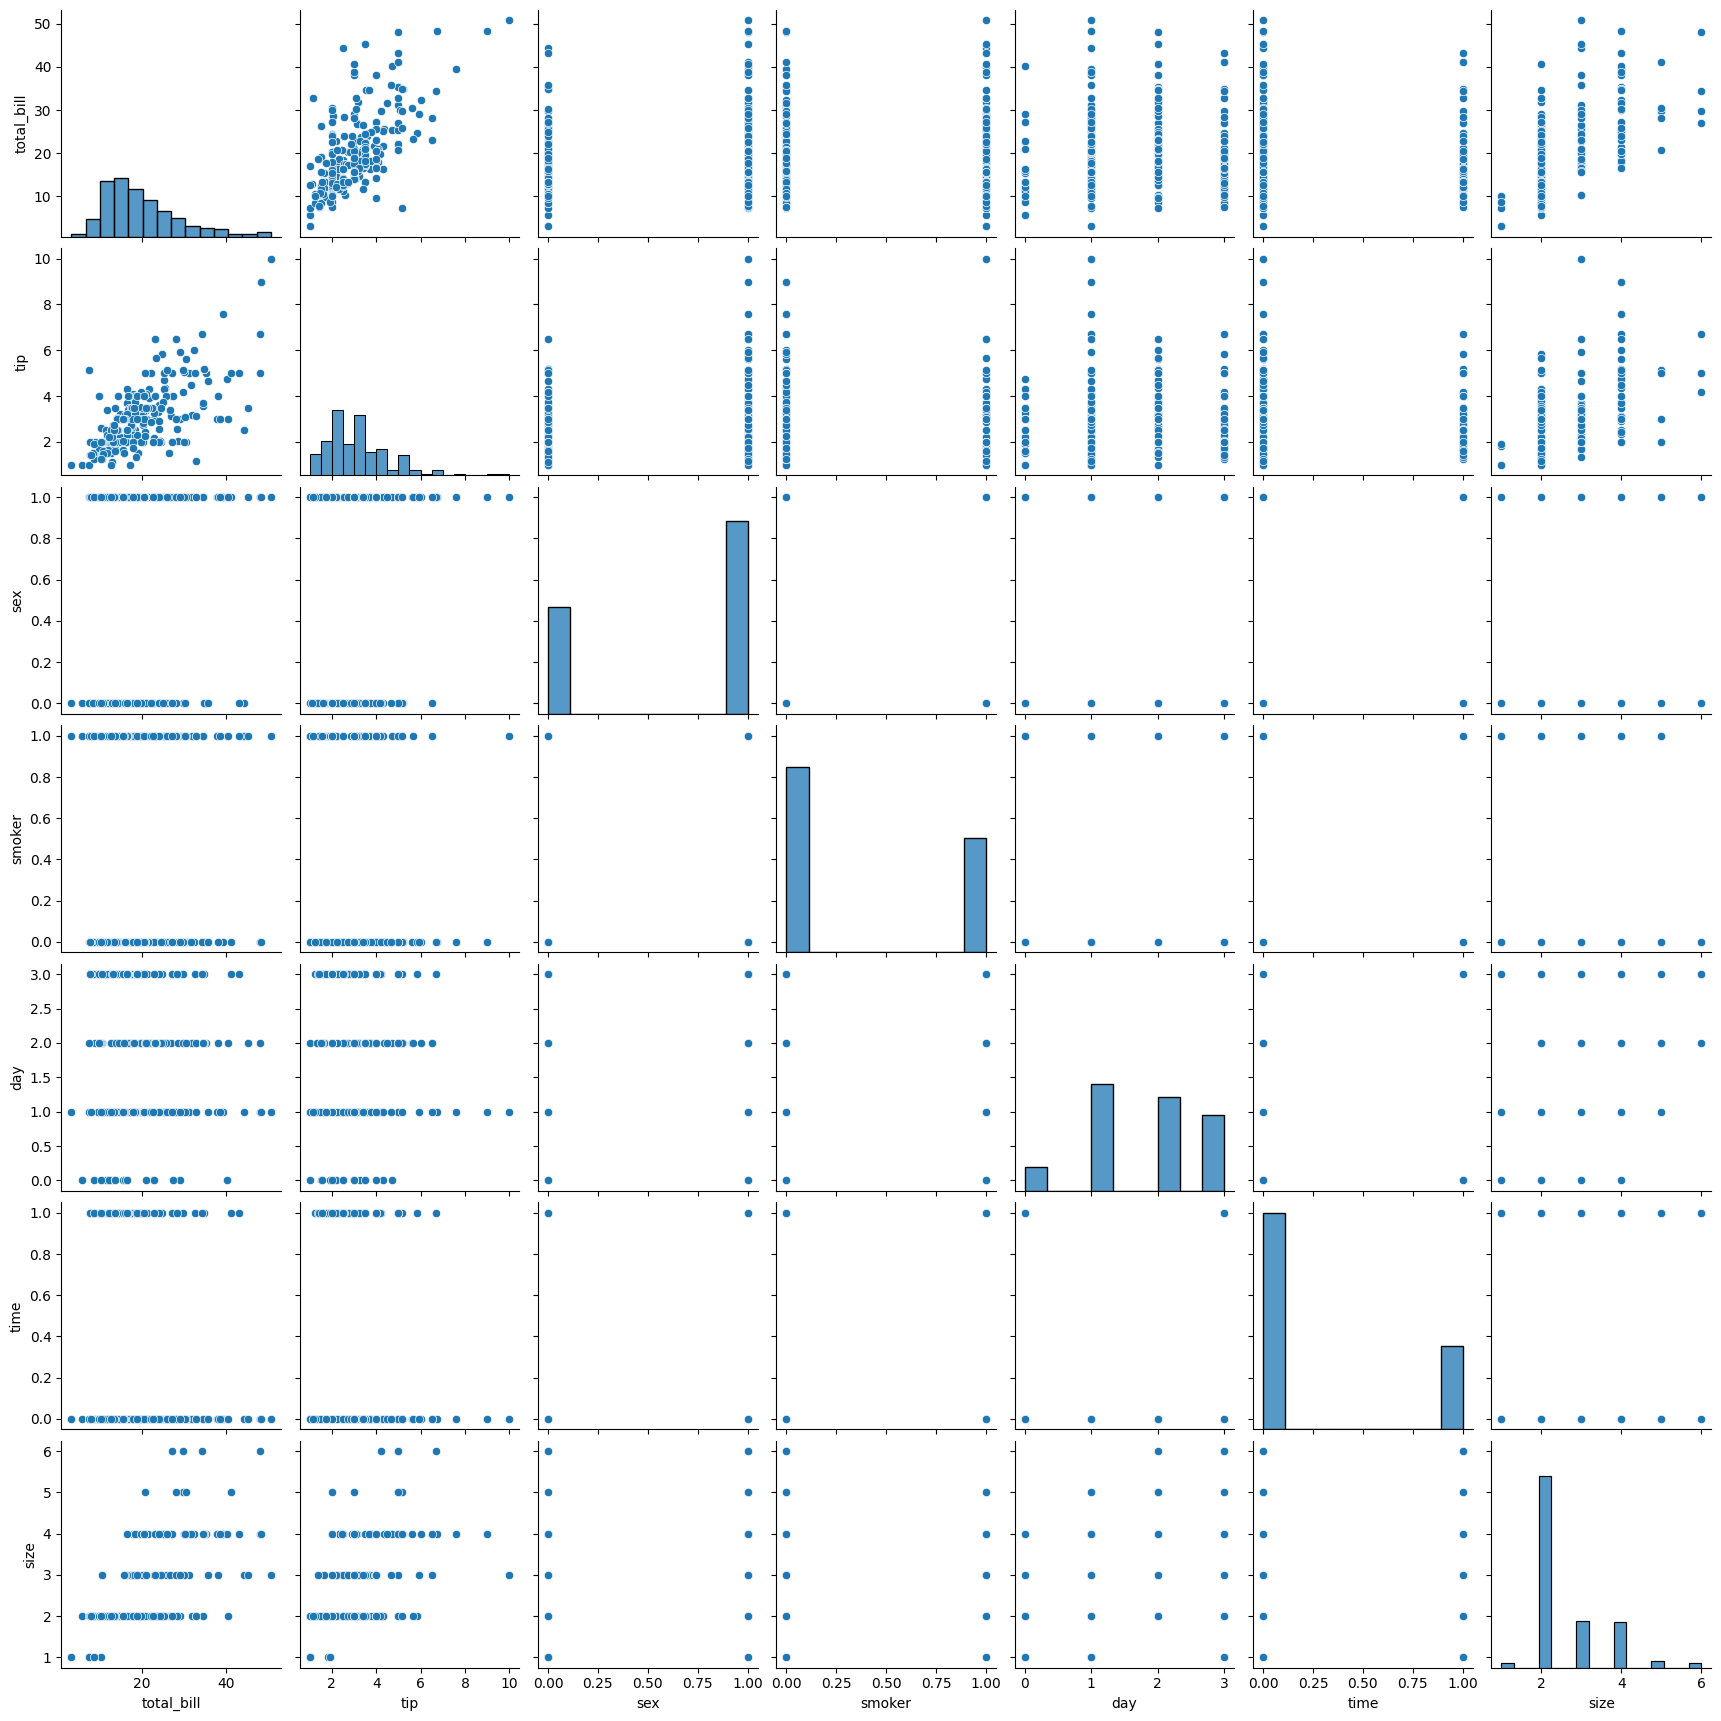

In [70]:
# Pair plot to visualize relationships between features and 'tip'
sns.pairplot(df)
plt.show()

<Axes: >

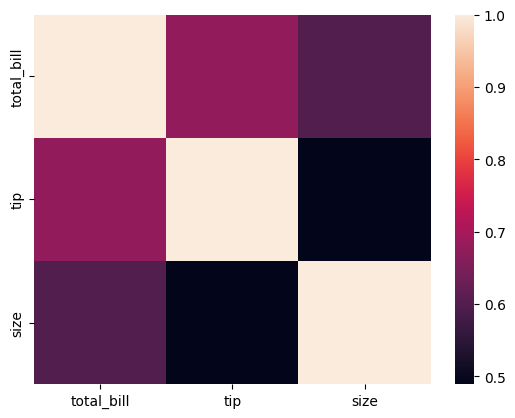

In [71]:
# Heatmap to show correlation between features and the target variable
data_corr = df[['total_bill', 'tip', 'size']].copy()
corr = data_corr.corr()
sns.heatmap(corr)

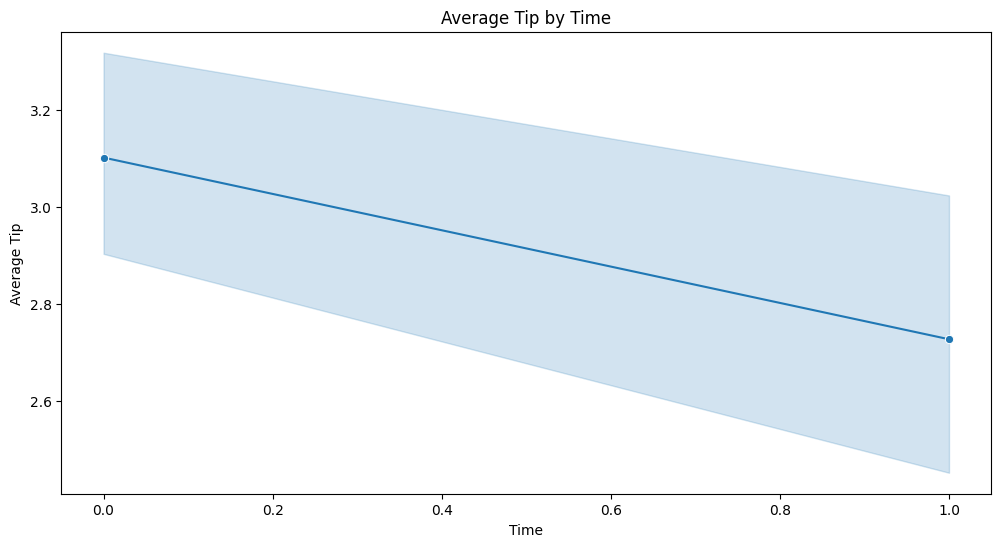

In [72]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="time", y="tip", marker="o")
plt.title("Average Tip by Time")
plt.xlabel("Time")
plt.ylabel("Average Tip")
plt.show()

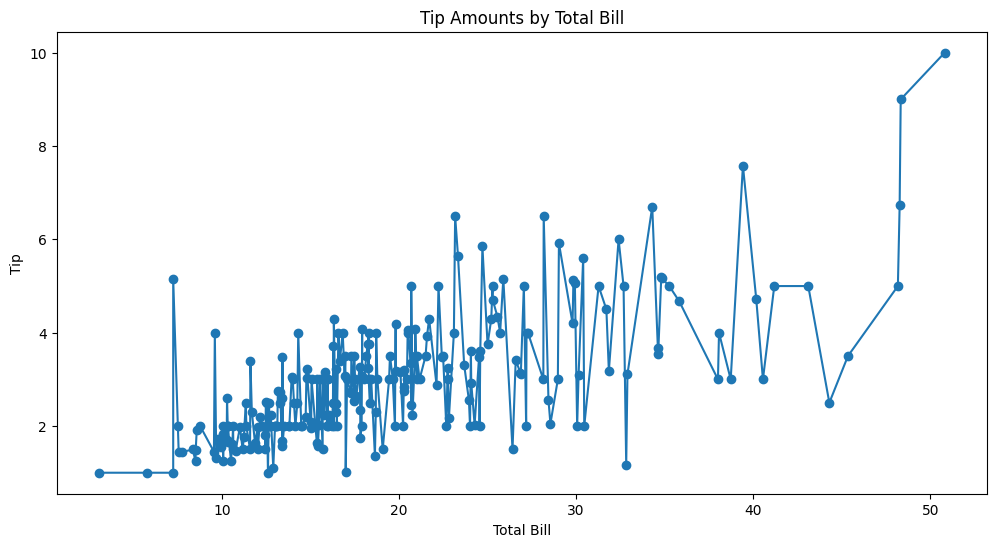

In [73]:
sorted_data = df.sort_values(by='total_bill')
plt.figure(figsize=(12, 6))
plt.plot(sorted_data['total_bill'], sorted_data['tip'], marker='o', linestyle='-')
plt.title("Tip Amounts by Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

In [74]:
X = df[['total_bill', 'size']]  # Replace with relevant predictors
y = df['tip']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print("Rainbow test p-value:", rainbow_p_val)
if rainbow_p_val < 0.05:
    print("Non-linearity detected (p < 0.05), consider non-linear models.")
else:
    print("Data appears linear (p >= 0.05).")


Rainbow test p-value: 0.17048935693447642
Data appears linear (p >= 0.05).


### MODELS AND THEIR TRAINING

In [98]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Function to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-" * 30)
    return mse, mae, r2, y_pred

# Function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

Evaluating Linear Regression...

Linear Regression Performance:
Mean Squared Error: 0.69
Mean Absolute Error: 0.67
R^2 Score: 0.44
------------------------------


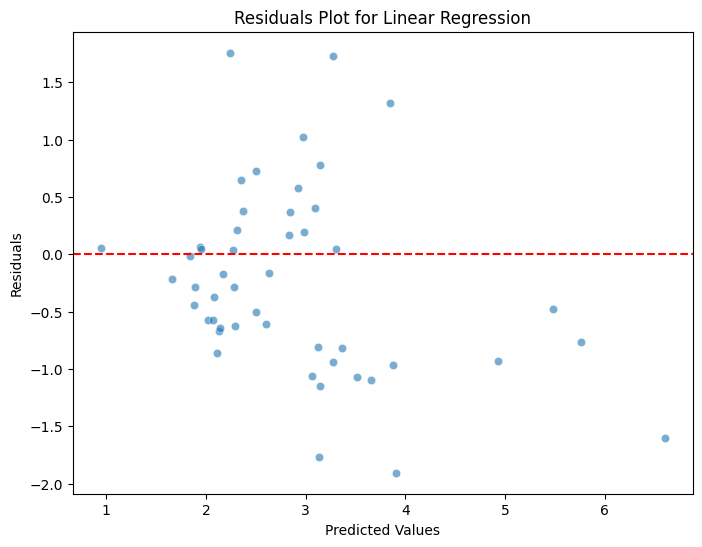

Evaluating Ridge Regression...

Ridge Regression Performance:
Mean Squared Error: 0.69
Mean Absolute Error: 0.67
R^2 Score: 0.45
------------------------------


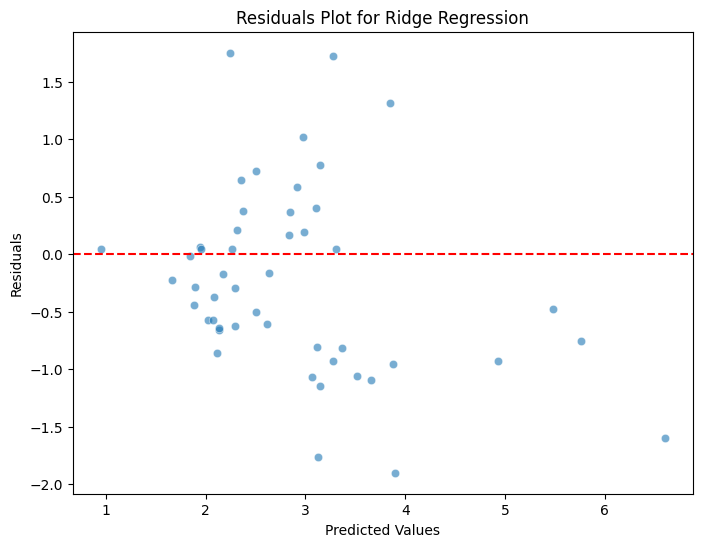

Evaluating Lasso Regression...

Lasso Regression Performance:
Mean Squared Error: 0.67
Mean Absolute Error: 0.66
R^2 Score: 0.46
------------------------------


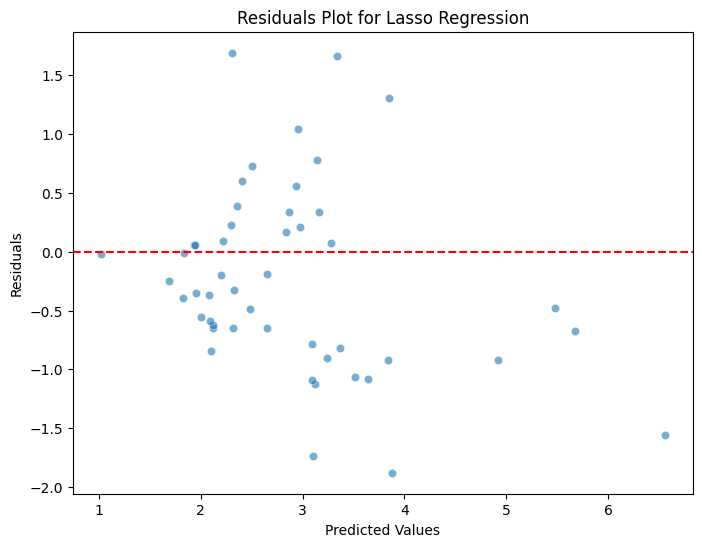

Evaluating Decision Tree...

Decision Tree Performance:
Mean Squared Error: 1.41
Mean Absolute Error: 0.92
R^2 Score: -0.13
------------------------------


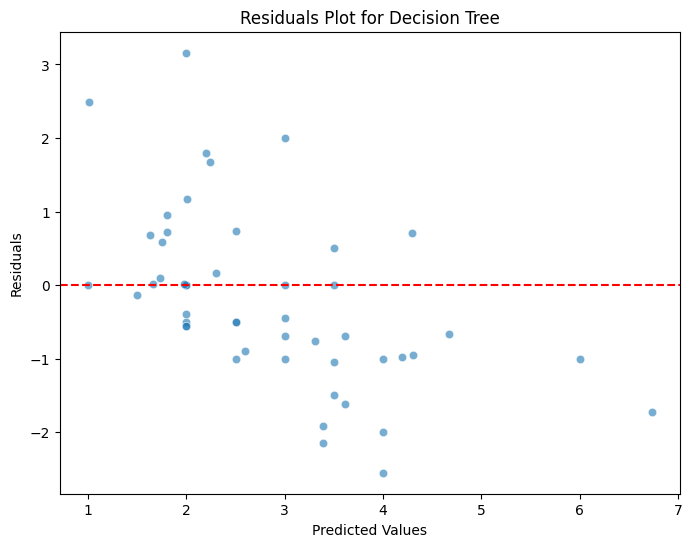

Evaluating Random Forest...

Random Forest Performance:
Mean Squared Error: 0.96
Mean Absolute Error: 0.78
R^2 Score: 0.23
------------------------------


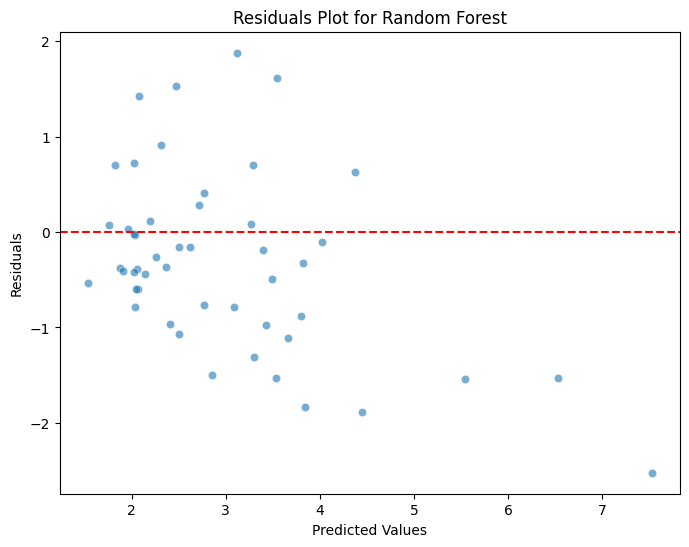

Evaluating SVR...

SVR Performance:
Mean Squared Error: 0.54
Mean Absolute Error: 0.57
R^2 Score: 0.57
------------------------------


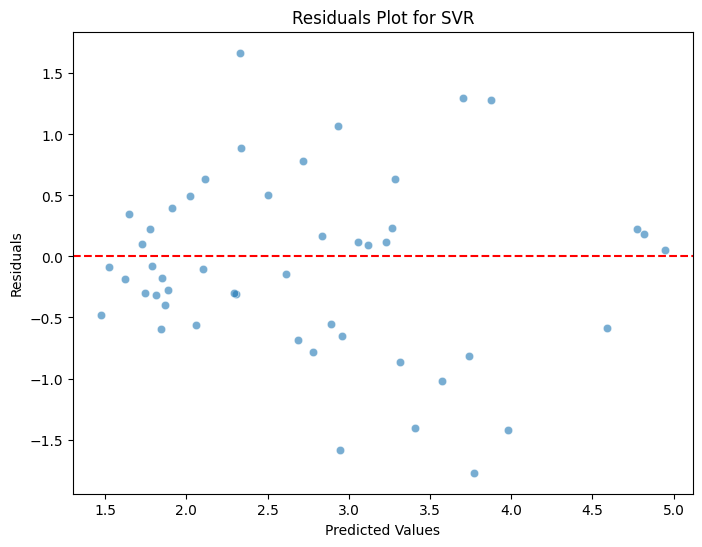

Evaluating KNN...

KNN Performance:
Mean Squared Error: 0.84
Mean Absolute Error: 0.73
R^2 Score: 0.33
------------------------------


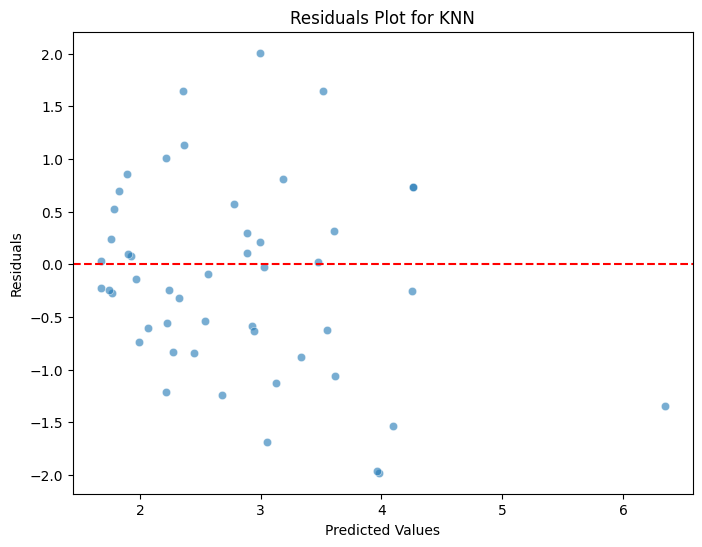

In [99]:
results = {}
# Loop through all models, evaluate, and plot residuals
for name, model in models.items():
    print(f"Evaluating {name}...\n")
    
    # Evaluate model and get predictions
    mse, mae, r2, y_pred = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    
    # Plot residuals for each model
    plot_residuals(y_test, y_pred, name)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

In [100]:
# Extract feature importance for models that provide it
for name in models:
    model = models[name]
    model.fit(X_train, y_train)
    if hasattr(model, 'coef_'):
        print(f"{name} Coefficients:")
        for feature, coef in zip(X.columns, model.coef_):
            print(f"{feature}: {coef:.4f}")
    elif hasattr(model, 'feature_importances_'):
        print(f"{name} Feature Importances:")
        for feature, importance in zip(X.columns, model.feature_importances_):
            print(f"{feature}: {importance:.4f}")
    else:
        print(f"{name} does not provide feature importance.")
    print("-" * 30)

Linear Regression Coefficients:
const: 0.0940
total_bill: 0.0327
size: -0.1917
------------------------------
Ridge Regression Coefficients:
const: 0.0940
total_bill: 0.0315
size: -0.1872
------------------------------
Lasso Regression Coefficients:
const: 0.0939
total_bill: 0.0000
size: -0.1472
------------------------------
Decision Tree Feature Importances:
const: 0.7502
total_bill: 0.0470
size: 0.0670
------------------------------
Random Forest Feature Importances:
const: 0.7689
total_bill: 0.0269
size: 0.0710
------------------------------
SVR does not provide feature importance.
------------------------------
KNN does not provide feature importance.
------------------------------


1. Linear Regression
Most Contributing Feature: size (Coefficient: -0.1917)
2. Ridge Regression
Most Contributing Feature: size (Coefficient: -0.1872)
3. Lasso Regression
Most Contributing Feature: size (Coefficient: -0.1472)
4. Random Forest
Most Contributing Feature: size (Importance: 0.0670)
5. Decision Tree
Most Contributing Feature: size (Importance: 0.0.0710)
7. SVR
Does not provide feature importance.
8. KNN
Does not provide feature importance.

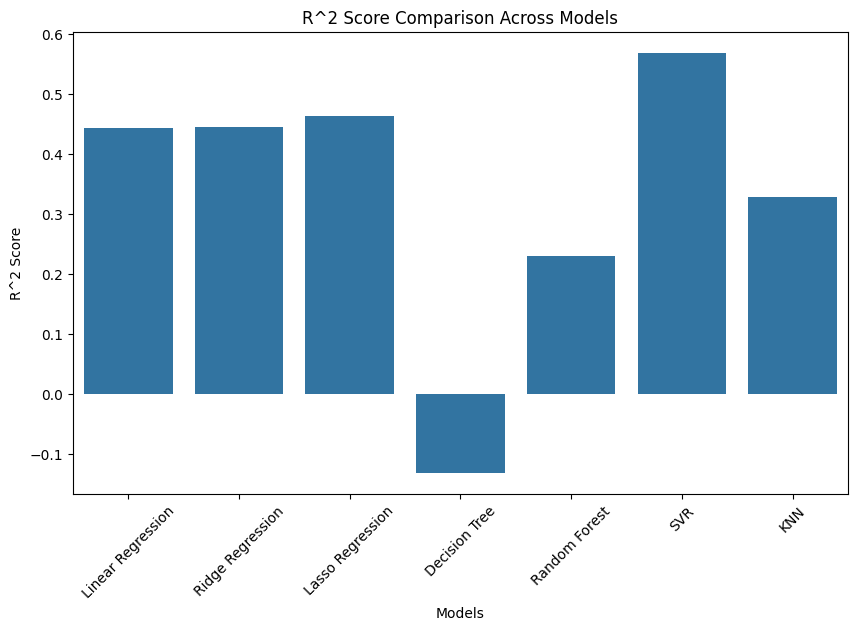

In [101]:
# Visualize R2 scores of each model
model_names = list(results.keys())
r2_scores = [results[name]['R2'] for name in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores)
plt.title("R^2 Score Comparison Across Models")
plt.xlabel("Models")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)
plt.show()

#### Here we can see that SVR (Support Vector Regression, with 'rbf' kernel) performs the best amongst all the other regression model

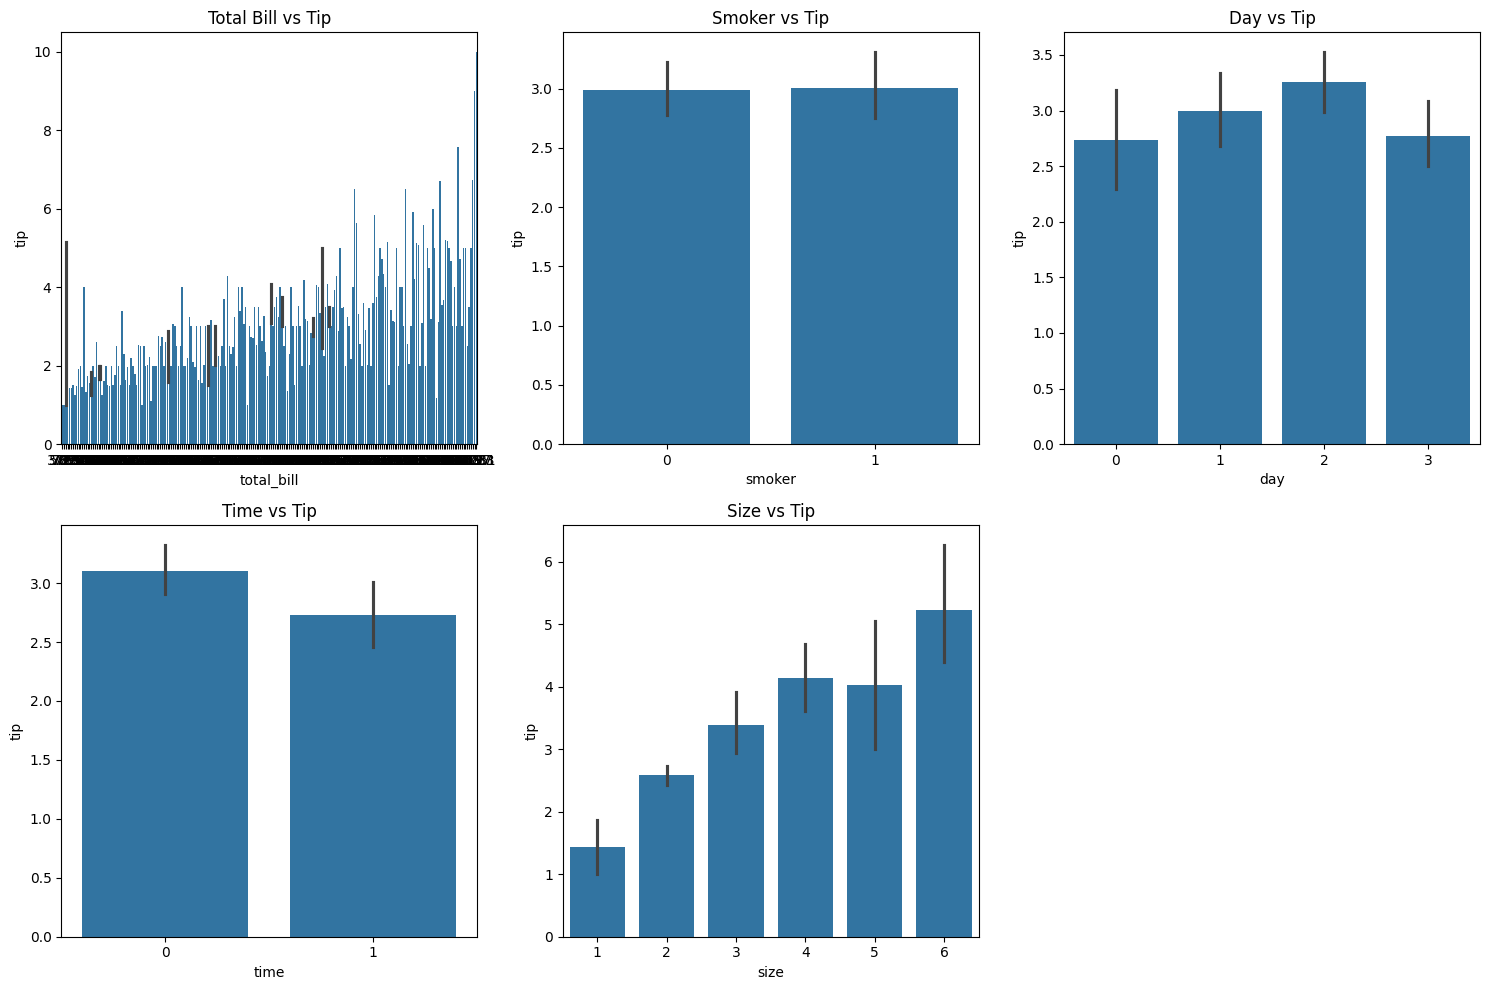

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# List of features for which we are plotting the barplots
features = ["total_bill", "smoker", "day", "time", "size"]
titles = ["Total Bill vs Tip", "Smoker vs Tip", "Day vs Tip", "Time vs Tip", "Size vs Tip"]

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the features and axes to create the barplots
for i, feature in enumerate(features):
    sns.barplot(x=df[feature], y=df["tip"], ax=axes[i])
    axes[i].set_title(titles[i])  # Set title for each subplot

# Turn off the last (unused) subplot
axes[5].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Insights for Management :

## Focus on Group Service
Larger groups leave higher tips. Offer group discounts and assign experienced staff to serve larger tables for better service and higher tips.

## Encourage Higher Bills
Higher spending correlates with higher tips. Train staff to upsell, create premium packages, and strategically design the menu to boost total bill amounts.

## Boost Weekend Spending
Tips are slightly lower on weekends. Use promotions and special offers on weekends to drive spending and improve tips.

## Optimize for Non-Smokers
Smokers tend to tip less. Create designated smoking areas and offer incentives for non-smoking sections to improve the environment and encourage higher tipping.

## Tailor Service by Demographics
Small differences in tipping by gender suggest targeted service approaches could be effective. Train staff to adapt based on customer demographics.

## Streamline Lunch Service
Lunch tips are consistent but lower. Offer quick, efficient lunch options and deals to attract a larger crowd and increase revenue.
By implementing these strategies, management can enhance customer satisfaction, improve revenue, and encourage higher tipping.